# KNN- K nearest Neighbors

In [1]:
# input: [sweetness,crunchiness]
X = [[10,9],[1,4],[10,1],[7,10],[3,10],[1,1],[5,10]]

In [2]:
y = ['fruit','protein','fruit','vegetable','vegetable','protein','vegetable']

In [3]:
import numpy as np
np.unique(y)

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsClassifier(n_neighbors=3)

In [5]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
tomato = [[6,10]]

In [8]:
model.predict(tomato)

array(['vegetable'], dtype='<U9')

In [9]:
pineapple = [[10,2]]
model.predict(pineapple)

array(['fruit'], dtype='<U9')

In [10]:
model.score(X,y)*100

85.71428571428571

In [11]:
model.n_neighbors

3

In [12]:
model.classes_

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [13]:
model.predict([[10,2]])

array(['fruit'], dtype='<U9')

In [14]:
model.predict_proba([[10,2]])

array([[0.66666667, 0.        , 0.33333333]])

In [15]:
2/3
# Neigbours: 1NN:Fruit 2NN:Protein 3NN:Vegetable

0.6666666666666666

In [16]:
1/3

0.3333333333333333

In [17]:
model.predict_proba([[6,10]])#tomato

array([[0., 0., 1.]])

In [18]:
3/3 # all 3 are of Vegetabl. category

1.0

In [ ]:
model.predict_proba([[6,4]])

In [ ]:
model.predict([[6,4]])

### lets change k Value

In [19]:
model_2 = KNeighborsClassifier(n_neighbors=7)
model_2.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [20]:
model_2.classes_

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [21]:
model_2.predict([[12,7]])

array(['vegetable'], dtype='<U9')

In [22]:
model_2.predict_proba([[12,7]])

array([[0.28571429, 0.28571429, 0.42857143]])

In [25]:
# 7 NN==> 2 (fruits), 2(protein), 3(Veg.)
3/7

0.42857142857142855

In [26]:
model_2.score(X,y)*100

42.857142857142854

# Find out K value???

In [27]:
from sklearn.metrics import f1_score

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
print(knn.score(X,y)*100)

85.71428571428571


In [34]:
len(X)

7

In [37]:
score = []
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    score.append(knn.score(X,y)*100)

In [38]:
score

[100.0,
 100.0,
 85.71428571428571,
 85.71428571428571,
 71.42857142857143,
 57.14285714285714]

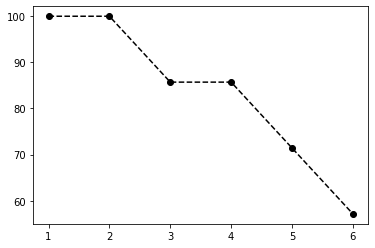

In [39]:
import matplotlib.pyplot as plt 

plt.plot(range(1,7),score,'--ko')

In [40]:
for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    print('k=',i,'f1=',f1_score(y,y_pred,average='weighted'))

k= 1 f1= 1.0
k= 2 f1= 1.0
k= 3 f1= 0.8435374149659863
k= 4 f1= 0.8435374149659863
k= 5 f1= 0.7023809523809523
k= 6 f1= 0.47619047619047616
k= 7 f1= 0.2571428571428571


In [41]:
f1 = []
k = []
for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    f1.append(f1_score(y,y_pred,average='weighted'))
    k.append(i)

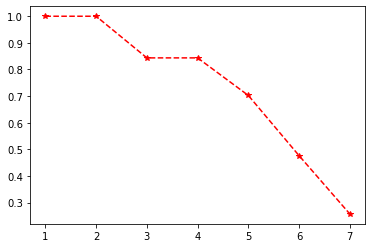

In [42]:
import matplotlib.pyplot as plt
plt.plot(k,f1,color='red',marker='*',linestyle='--')

# Hyperparamter tuning

In [47]:
KNeighborsClassifier?

In [43]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params = {
            'n_neighbors': [3,5,7],
            'weights': ['uniform', 'distance'],
            'p': [1,2],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
        }

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=2,
    n_jobs=-1,
    verbose=1
)

In [44]:
clf

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [45]:
clf.fit(X,y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.45833333 0.875      0.45833333 0.875             nan        nan
        nan        nan        nan        nan        nan        nan
 0.45833333 0.875      0.45833333 0.875             nan        nan
        nan        nan        nan        nan        nan        nan
 0.45833333 0.875      0.45833333 0.875             nan        nan
        nan        nan        nan        nan        nan        nan
 0.45833333 0.875      0.45833333 0.875             nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [46]:
#now we can ask to clf about best parameters
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [48]:
params

{'n_neighbors': [3, 5, 7],
 'weights': ['uniform', 'distance'],
 'p': [1, 2],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [49]:
#now check final model
clf.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [50]:
knn_2 = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [51]:
knn_2.fit(X,y)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [52]:
knn_2.score(X,y)

1.0